In [1]:
import neuralflow
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# print module path:
print(neuralflow.__file__)

/Users/xinzheng/Desktop/Engel_rotation/TestBrainFlow/neuralflow/__init__.py


## 1. Testing Goal:

In this notebook we test if the periodic BC we implemented can solve the eigenvalue problem, even with degenerative linear systems, by which we mean that the eigenvalue is associated with more than one linearly independent eigenfunctions. 

We find that that solver outputs repeated eigenvalues according to their geometric multiplicity, which makes sense since our system is non defective thus diagnalizable. Next we would like to visualize the eigenfunctions, and the objective is to confirm that the two numerical functions span the same eigenspace as the exact solutions. 


### Fourier Equation with Periodic BC:


Consider the second order differential equation:

$$ 
\begin{equation}
\frac{d^{2} X}{d x^{2}}+\lambda X=0, \quad 0<x<L
\end{equation} 
$$

with periodic boundary conditions

$$ 
\begin{equation}
X(0) = X(L), \;\;\;\;\; X'(0) = X'(L)
\end{equation} 
$$


The eigenvalues and the corresponding eigenfunctions for the analytical solution are:

When $\lambda = 0$, $X = C_{0}$ is a solution;

When $\lambda > 0$, we have a series of solutions: 

$$
\begin{equation}
\lambda_{n}=\left( \frac{2 n \pi}{L}\right)^{2} \quad(n=1,2, \cdots)
\end{equation}
$$

$$
\begin{equation}
X_{n}(x)=  C_{1} \cos \left( \frac{2 n \pi x}{L} \right) +  C_{2} \sin  \left( \frac{2 n \pi x}{L}\right) \quad \; \; (n=1,2, \cdots)
\end{equation}
$$

Where $ C_{1}$ and $C_{2}$ are arbitrary coefficients. 

## 2. Testing Procedure:

From above we know that the eigenspace associated with each $\lambda_{n}$ is spanned by a sine and cosine function with the same periodicity. Thus, if the numerical solution is correct, the two numerical eigenfunctions we found shoud two linearly independent combinations of the sine and cosine function.

We come up with two procedures to test if the above is ture:

1. As a consequence, if $f_{1}$ and $f_{2}$ are combinations of sine and cosine of the same periodicity, and that they are normalized, the resulting functions will be sinusoidal functions with the same periodicity, differ by a phase shift; 
    - (Proof idea: first show that $C_{1}^{2} + C_{2}^2 = 1$ by contradiction, then use the trig identity)

    - Therefore, we want to visualize the normalized numerical solutions, to see if they look like sinusoidal functions, and if they have the same periodicity as the sine and cosine in the exact solution.

![Image](https://mathonweb.com/help_ebook/html/trig/trig78.gif)

<br/>
2. By the Pythagorean rule we know that square of the Euclidian norm of a vector, should equal to the sum of square of the projection of the vector to a pair of orthogonal vectors, if the vector is in the same space generated by the base vectors. Then if we have two functions that satisfy the Pythagorean rule, they forms a basis of that space too. Therefore we can just the equality holds for the numerical solutions and the corresponding sines and cosines.  

<br/>

![Image](https://people.revoledu.com/kardi/tutorial/LinearAlgebra/images/VectorProjection_clip_image006.jpg) 


## 3. Numerical Solutions
####  Test Function Set Up:

In [3]:
xbegin = 0
xend = 1
BC = {'coupled':'periodic'}

In [4]:
### create a Solver class:
periodic_test_func = neuralflow.PDE_Solve.PDESolve(xbegin, xend, BoundCond = BC) 

In [5]:
### specify function form: -u''(x)=lambda*u(x); u(0)= u(1)=0, u'(0) = u'(1)
xgrid = periodic_test_func.x_d
Nv = 64

# exact evals:
EVal_0 = 0
EVals_trig = [((n+1)*2*np.pi)**2 for n in range(0,Nv//2)] # u_n = 2*pi*n, lambda_n = 2*pi*n square

# create normalized sines and cosines
EVec_sines = np.sin(np.outer(xgrid,np.sqrt(EVals_trig)))
EVec_cosines = np.cos(np.outer(xgrid,np.sqrt(EVals_trig)))
EVec_sines/=np.max(np.abs(EVec_sines),0) # normalize by the max
EVec_cosines/=np.max(np.abs(EVec_cosines),0) # normalize by the max

# set up the function form for an SLP:
p = -np.ones(len(xgrid)) 
q = None
w=np.ones(len(xgrid))

#### Plot the exact solutions:

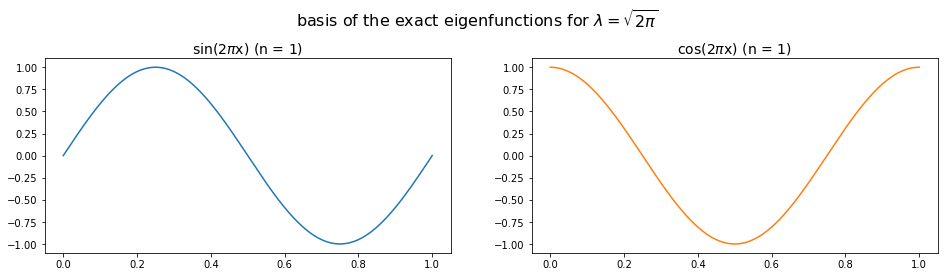

In [6]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [16,4])
ax[0].plot(xgrid, EVec_sines[:,0])
ax[0].set_title("sin(2$\pi$x) (n = 1)", fontsize = 14)
ax[1].plot(xgrid, EVec_cosines[:,0], color = "C1")
ax[1].set_title("cos(2$\pi$x) (n = 1)", fontsize = 14)
fig.suptitle("basis of the exact eigenfunctions for $\lambda = \sqrt{2 \pi}$", fontsize = 16)
plt.subplots_adjust(top =.8)
plt.show()

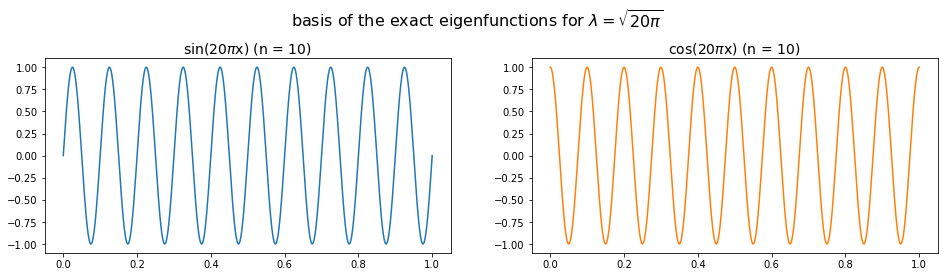

In [7]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [16,4])
ax[0].plot(xgrid, EVec_sines[:,9])
ax[0].set_title("sin(20$\pi$x) (n = 10)", fontsize = 14)
ax[1].plot(xgrid, EVec_cosines[:,9], color = "C1")
ax[1].set_title("cos(20$\pi$x) (n = 10)", fontsize = 14)
fig.suptitle("basis of the exact eigenfunctions for $\lambda = \sqrt{20 \pi}$", fontsize = 16)
plt.subplots_adjust(top =.8)
plt.show()

#### Solving the equation using `PDESolve()`:

In [8]:
### numerically solve the normalized SLP: 
NEVals, NEVecs = periodic_test_func.solve_EV(peq=p, q=q, w=w, mode='normal',Nv=Nv) # normal is just solving for SLP
NEVecs/=np.max(np.abs(NEVecs),0)

In [9]:
# take a look at the numerical evals: 
# they follow the analytical: 
# [0, (2*pi)^2, (2*pi)^2, (4*pi)^2, ...]
print("lambda 0:", NEVals[0])
print("lambda 1:", NEVals[1:3])
print("lambda 2:", NEVals[3:5])
print("lambda 3:", NEVals[5:7])

lambda 0: 1.25927943063635e-09
lambda 1: [39.47841761 39.47841761]
lambda 2: [157.91367042 157.91367042]
lambda 3: [355.30575844 355.30575844]


In [10]:
NEVal_0 = NEVals[0]
NEVal_trig = NEVals[1::2] # to plot remove the repeats

### Correspondance of Evals and Efuncs:

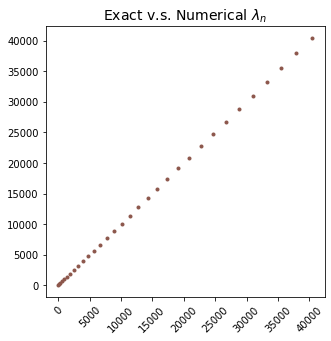

In [12]:
# will make a better looking plot, and plot the errors as well:


fig, ax = plt.subplots(ncols = 1, nrows = 1, figsize = [5,5])
ax.plot(EVals_trig, NEVal_trig, ".", color = "C5")
ax.tick_params(axis='x', labelrotation = 45)
ax.set_title("Exact v.s. Numerical $\lambda_{n}$", fontsize = 14)
plt.show()

In [13]:
# save lambda 0 and the postive evals seperately:
NEVec_0 = NEVecs[:,0]
NEVec_trig = NEVecs[:,1:]

#### Plot the numerical solutions:

They do look like sines and cosines with the phase shifted:

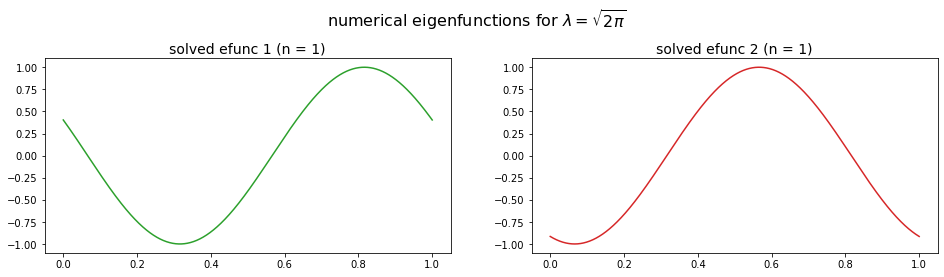

In [14]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [16,4])
ax[0].plot(xgrid, NEVec_trig[:,0], color = "C2")
ax[0].set_title("solved efunc 1 (n = 1)", fontsize = 14)
ax[1].plot(xgrid, NEVec_trig[:,1], color = "C3")
ax[1].set_title("solved efunc 2 (n = 1)", fontsize = 14)
fig.suptitle("numerical eigenfunctions for $\lambda = \sqrt{2 \pi}$", fontsize = 16)
plt.subplots_adjust(top =.8)
plt.show()

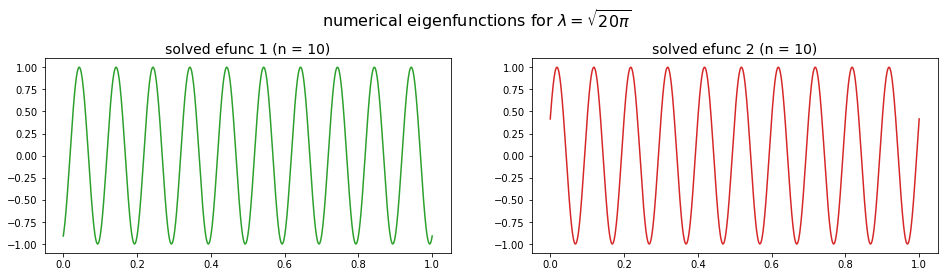

In [15]:
fig, ax = plt.subplots(ncols = 2, nrows = 1, figsize = [16,4])
ax[0].plot(xgrid, NEVec_trig[:,18], color = "C2")
ax[0].set_title("solved efunc 1 (n = 10)", fontsize = 14)
ax[1].plot(xgrid, NEVec_trig[:,19], color = "C3")
ax[1].set_title("solved efunc 2 (n = 10)", fontsize = 14)
fig.suptitle("numerical eigenfunctions for $\lambda = \sqrt{20 \pi}$", fontsize = 16)
plt.subplots_adjust(top =.8)
plt.show()

### Triples Test:

For each normalized eigenfunction $f_{n}$, We test the equality:

<br/>


$$
||f_{n}||^2 = \; \langle f, \sin(2\pi n) \rangle +  \langle f, \cos(2 \pi n) \rangle
$$

<br/>



![Image](https://people.revoledu.com/kardi/tutorial/LinearAlgebra/images/VectorProjection_clip_image006.jpg)

In [16]:
lhs_1 = np.array([((np.dot(NEVec_trig[:,2*n], EVec_sines[:, n]))**2 
        + (np.dot(NEVec_trig[:,2*n], EVec_cosines[:, n]))**2) for n in range(NEVal_trig.shape[0]-1)])

lhs_2 = np.array([((np.dot(NEVec_trig[:,2*n+1], EVec_sines[:, n]))**2 
        + (np.dot(NEVec_trig[:,2*n+1], EVec_cosines[:, n]))**2) for n in range(NEVal_trig.shape[0]-1)])

In [17]:
rhs_l = np.array([(np.dot(NEVec_trig[:,2*n], NEVec_trig[:,2*n]))**2 for n in range(NEVal_trig.shape[0]-1)])

rhs_2 = np.array([(np.dot(NEVec_trig[:,2*n+1], NEVec_trig[:,2*n+1]))**2 for n in range(NEVal_trig.shape[0]-1)])

#### Plotting the difference of LHS and RHS:

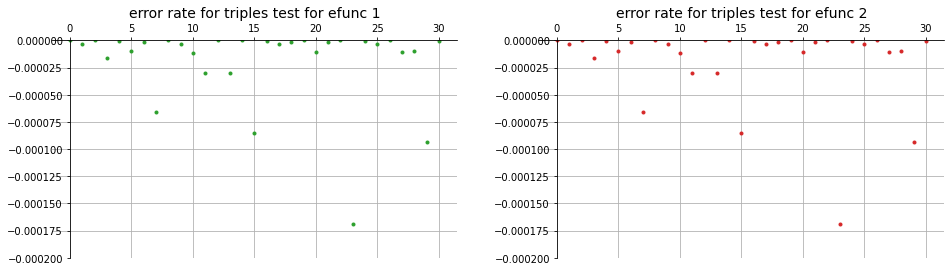

In [18]:
fig, ax = plt.subplots(ncols = 2, figsize = [16,4])
ax[0].plot((lhs_1- rhs_l)/rhs_l, 'o', color = "C2", markersize = 3)

ax[0].set_ylim(-.0002, 0)
# ax.set_aspect('equal')
ax[0].grid(True, which='both')

# set the x-spine (see below for more info on `set_position`)
ax[0].spines['left'].set_position('zero')

# turn off the right spine/ticks
ax[0].spines['right'].set_color('none')
# ax.yaxis.tick_left()

# set the y-spine
ax[0].spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax[0].spines['top'].set_color('none')
ax[0].xaxis.tick_top()
ax[0].set_title("error rate for triples test for efunc 1", fontsize = 14)


ax[1].plot((lhs_2- rhs_2)/rhs_2, 'o', color = "C3", markersize = 3)

ax[1].set_ylim(-.0002, 0)
# ax.set_aspect('equal')
ax[1].grid(True, which='both')

# set the x-spine (see below for more info on `set_position`)
ax[1].spines['left'].set_position('zero')

# turn off the right spine/ticks
ax[1].spines['right'].set_color('none')
ax[1].yaxis.tick_left()

# set the y-spine
ax[1].spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax[1].spines['top'].set_color('none')
ax[1].xaxis.tick_top()
ax[1].set_title("error rate for triples test for efunc 2", fontsize = 14)


plt.show()

Notice LHS is systematically smaller but this is not a big problem; and the error comes from the two solved functions for the same eigenvalue are awfully consistent (haven't given too much thoughts).

### Periodicity Test:

After we plot some numerical eigen functions, we see that they do look sinusoidal, and the periodicity look similar to that of the sine and cosine basis. We wrote a small funciton to find the periodicity, and plot the errors.

![Image](https://mathonweb.com/help_ebook/html/trig/trig78.gif)

In [19]:
def period_of(trig, xgrid):
    
    '''given an array of trig eigenfunction values, and the x coordinates, 
        output its period'''
    
    i = 0
    
    # if we start with slope > 0:
    if trig[0] < trig[1]:
        # while true:
        while i < trig.shape[0]:
            # keep counting
            if trig[i] < trig[i+1]:
                i += 1
            # till we exhaust this piecewise monotonicity:
            else:
                # keep the end point as our left pointer for half periodicity:
                pointer_l = i
                break
    
        # start counting for the period:
        j = 0 # j would be the length of indexes that span the half period
        while pointer_l < trig.shape[0]:
            # when we have slope < 0, keep counting:
            if trig[j+ pointer_l] >= trig[j+pointer_l+1]:
                j += 1
            else:
                break 
                
    # if we start with slope < 0:
    else:
        while i < trig.shape[0]:
            if trig[i] >= trig[i+1]:
                i += 1
            else:
                pointer_l = i
                break
        j = 0
        while pointer_l < trig.shape[0]:
            if trig[j+pointer_l] <= trig[j+pointer_l+1]:
                j += 1
            else:
                break
    
    period = (xgrid[pointer_l + j] - xgrid[pointer_l])*2
    
    return period

In [20]:
# priodicity of sin and cos when n = 10, should be 1/10:
[period_of(EVec_sines[:, 9], xgrid), period_of(EVec_cosines[:, 9], xgrid)]

[0.10006874623620836, 0.10006874623620833]

In [21]:
# priodicity of solved funcs when n = 10, should be 1/10:
[period_of(NEVec_trig[:, 18], xgrid), period_of(NEVec_trig[:, 19], xgrid)]

[0.09946656378883885, 0.09992734986013689]

In [22]:
sine_periods = np.array([ period_of(EVec_sines[:, n], xgrid) for n in range(NEVal_trig.shape[0]-1)])
f1_periods = np.array([ period_of(NEVec_trig[:, 2*n], xgrid) for n in range(NEVal_trig.shape[0]-1)])
f2_periods = np.array([ period_of(NEVec_trig[:, 2*n+1], xgrid) for n in range(NEVal_trig.shape[0]-1)])

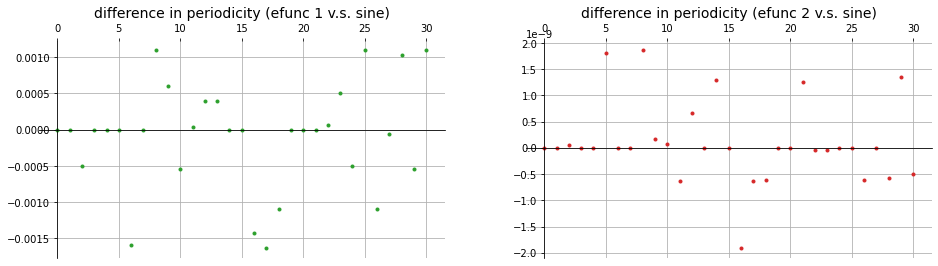

In [25]:
fig, ax = plt.subplots(ncols = 2, figsize = [16,4])
ax[0].plot(sine_periods - f1_periods, 'o', color = "C2", markersize = 3)

# ax[0].set_ylim(-.0002, 0)
# ax.set_aspect('equal')
ax[0].grid(True, which='both')

# set the x-spine (see below for more info on `set_position`)
ax[0].spines['left'].set_position('zero')

# turn off the right spine/ticks
ax[0].spines['right'].set_color('none')
# ax.yaxis.tick_left()

# set the y-spine
ax[0].spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax[0].spines['top'].set_color('none')
ax[0].xaxis.tick_top()
ax[0].set_title("difference in periodicity (efunc 1 v.s. sine)", fontsize = 14)


ax[1].plot((sine_periods- f2_periods)/rhs_2, 'o', color = "C3", markersize = 3)

# ax[1].set_ylim(-.0002, 0)
# ax.set_aspect('equal')
ax[1].grid(True, which='both')

# set the x-spine (see below for more info on `set_position`)
ax[1].spines['left'].set_position('zero')

# turn off the right spine/ticks
ax[1].spines['right'].set_color('none')
ax[1].yaxis.tick_left()

# set the y-spine
ax[1].spines['bottom'].set_position('zero')

# turn off the top spine/ticks
ax[1].spines['top'].set_color('none')
ax[1].xaxis.tick_top()
ax[1].set_title("difference in periodicity (efunc 2 v.s. sine)", fontsize = 14)


plt.show()